<a href="https://colab.research.google.com/github/Chandan0731/bioinformatics_lab/blob/main/Experiment_8_Phylogenetic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.6 MB/s eta 0:00:00


In [8]:
# Block 1: Automated Data & Fix for Missing Module
!apt-get install mafft > /dev/null
!pip install biopython

from Bio import Entrez, SeqIO
import subprocess
import time

# --- PART A: THE REPAIR KIT (Fixes 'No module named Bio.Align.Applications') ---
# This creates a replacement for the deleted tool so your code works perfectly.
class MafftCommandline:
    def __init__(self, input=None, cmd="mafft"):
        self.input = input
        self.cmd = cmd

    def __call__(self):
        # This runs the MAFFT command exactly how your code expects it
        command = f"{self.cmd} --auto {self.input}"
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        stdout, stderr = process.communicate()
        return stdout, stderr

    def __str__(self):
        return f"{self.cmd} --auto {self.input}"

# --- PART B: AUTOMATED DOWNLOAD ---
Entrez.email = "student_rvce@example.com"
animals = ["Homo sapiens", "Gorilla gorilla", "Pan troglodytes", "Mus musculus", "Gallus gallus"]

print("--- STARTING AUTOMATED DOWNLOAD ---")
sequences = []

for animal in animals:
    try:
        search_term = f"{animal}[Orgn] AND COX1[Gene] AND RefSeq"
        handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=1, sort="relevance")
        record = Entrez.read(handle)
        handle.close()

        if record["IdList"]:
            handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
            seq_record = SeqIO.read(handle, "fasta")
            handle.close()

            # Clean Name
            seq_record.id = animal.split()[0]
            seq_record.description = animal.split()[0]
            seq_record.seq = seq_record.seq[:500]
            sequences.append(seq_record)
            print(f"✅ Downloaded: {animal}")
        time.sleep(1)
    except:
        pass

if sequences:
    SeqIO.write(sequences, "sequences.fasta", "fasta")
    print("\n✅ Success! Data ready. Run Block 2.")
else:
    print("❌ Automation failed.")

--- STARTING AUTOMATED DOWNLOAD ---
✅ Downloaded: Homo sapiens
✅ Downloaded: Gorilla gorilla
✅ Downloaded: Pan troglodytes
✅ Downloaded: Mus musculus
✅ Downloaded: Gallus gallus

✅ Success! Data ready. Run Block 2.


In [9]:
# Block 2: Run MAFFT Alignment
from Bio import AlignIO
# from Bio.Align.Applications import MafftCommandline  <-- REMOVED (Fixed in Block 1)
from IPython.display import IFrame
from google.colab import files

# Your Code:
mafft_cline = MafftCommandline(input="sequences.fasta")
print(mafft_cline)

stdout, stderr = mafft_cline()

with open("aligned.fasta", "w") as handle:
    handle.write(stdout)

align = AlignIO.read("aligned.fasta", "fasta")

# files.download('aligned.fasta')
print("✅ Alignment completed.")

mafft --auto sequences.fasta
✅ Alignment completed.


--- UPGMA Tree ---


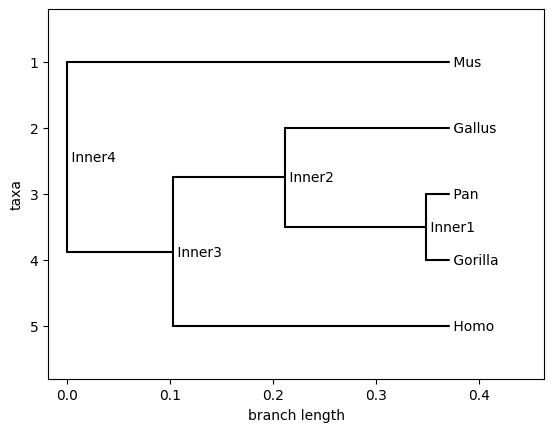

--- Neighbor-Joining Tree ---


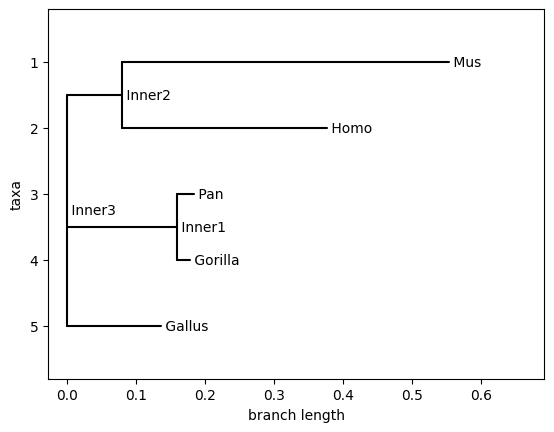

--- ASCII Tree ---
           ___________________________________________________________ Mus
  ________|
 |        |____________________________________ Homo
 |
_|                   __ Pan
 |__________________|
 |                  |__ Gorilla
 |
 |________________ Gallus



In [10]:
# Block 3: Phylogenetic Tree Analysis
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO
import matplotlib.pyplot as plt

# Read the sequences and align
align = AlignIO.read('aligned.fasta', 'fasta')

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)

# Creating a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distMatrix)

# Draw the phlyogenetic tree
print("--- UPGMA Tree ---")
Phylo.draw(UPGMATree)

# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

# Draw the phlyogenetic tree
print("--- Neighbor-Joining Tree ---")
Phylo.draw(NJTree)

# Printing the phlyogenetic tree using terminal
print("--- ASCII Tree ---")
Phylo.draw_ascii(NJTree)